In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
from scipy import stats

In [3]:
data = np.genfromtxt('drc_flc_CR/flcs_w_drcMAGS.dat',names=True)

In [4]:
data0 = np.genfromtxt('drc_flc_match/flcs_w_drcMAGS.dat',names=True)

In [5]:
psf = np.genfromtxt('mattia/psf_tight_1202.dat',names=True)
aper = np.genfromtxt('mattia/aper_tight_1202.dat',names=True)

In [6]:
flc_up= np.genfromtxt('drc_flc_CR/up_flc_f814w_matched.dat',names=True)
flc_low= np.genfromtxt('drc_flc_CR/low_flc_f814w_matched.dat',names=True)

In [7]:
drc_all = np.genfromtxt('drc_flc_CR/all_drc_f814w_matched.dat',names=True)

In [102]:
lit_all = np.genfromtxt('hor1dir1803/dir2503/HORI_pix_2503_comb.dat',names=True)

In [84]:
# lit_all = np.genfromtxt('hor1dir3103/HORI_pix_3103_comb_nC.dat',names=True)

In [94]:
past_flc = np.genfromtxt('hor1dir6pix/HORI_pix_2212_d6_dist.dat',names=True)

In [95]:
full_drc = np.genfromtxt('/Users/hr8jz/Box Sync/Research/source_lists/june13/HOROLOGIUM-I_sfErr.dat',names=True)

In [8]:
flc_all = np.hstack((flc_up,flc_low))
print(flc_all.shape)

(48,)


In [9]:
# the difference between the DRC mean mag and the flc mean
flc1_diff_arr_606 = data['magDRC_f606w']-data['mag1_f606w']
flc2_diff_arr_606 = data['magDRC_f606w']-data['mag2_f606w']
flc3_diff_arr_606 = data['magDRC_f606w']-data['mag3_f606w']
flc4_diff_arr_606 = data['magDRC_f606w']-data['mag4_f606w']

In [10]:
# sigma clipping those
flc1_606_sc = stats.sigmaclip(flc1_diff_arr_606,2.5,2.5)
flc2_606_sc = stats.sigmaclip(flc2_diff_arr_606,2.5,2.5)
flc3_606_sc = stats.sigmaclip(flc3_diff_arr_606,2.5,2.5)
flc4_606_sc = stats.sigmaclip(flc4_diff_arr_606,2.5,2.5)

In [11]:
# the difference between the DRC mean mag and the flc mean
flc1_diff_arr_814 = data['magDRC_f814w']-data['mag1_f814w']
flc2_diff_arr_814 = data['magDRC_f814w']-data['mag2_f814w']
flc3_diff_arr_814 = data['magDRC_f814w']-data['mag3_f814w']
flc4_diff_arr_814 = data['magDRC_f814w']-data['mag4_f814w']

In [12]:
# sigma clipping those
flc1_814_sc = stats.sigmaclip(flc1_diff_arr_814,2.5,2.5)
flc2_814_sc = stats.sigmaclip(flc2_diff_arr_814,2.5,2.5)
flc3_814_sc = stats.sigmaclip(flc3_diff_arr_814,2.5,2.5)
flc4_814_sc = stats.sigmaclip(flc4_diff_arr_814,2.5,2.5)

In [13]:
# calculating the mean difference between DRC and FLC; using that as mag correction
mag1_606_corr = np.mean(flc1_606_sc[0])
mag2_606_corr = np.mean(flc2_606_sc[0])
mag3_606_corr = np.mean(flc3_606_sc[0])
mag4_606_corr = np.mean(flc4_606_sc[0])

In [14]:
mag1_814_corr = np.mean(flc1_814_sc[0])
mag2_814_corr = np.mean(flc2_814_sc[0])
mag3_814_corr = np.mean(flc3_814_sc[0])
mag4_814_corr = np.mean(flc4_814_sc[0])

In [15]:
# applying the correction
mag1_606_corr_arr = data['mag1_f606w'] + mag1_606_corr
mag2_606_corr_arr = data['mag2_f606w'] + mag2_606_corr
mag3_606_corr_arr = data['mag3_f606w'] + mag3_606_corr
mag4_606_corr_arr = data['mag4_f606w'] + mag4_606_corr

In [16]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, len(data), len(data)+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [17]:
index = np.arange(0,len(data),1)

In [18]:
# applying the correction
mag1_814_corr_arr = data['mag1_f814w'] + mag1_814_corr
mag2_814_corr_arr = data['mag2_f814w'] + mag2_814_corr
mag3_814_corr_arr = data['mag3_f814w'] + mag3_814_corr
mag4_814_corr_arr = data['mag4_f814w'] + mag4_814_corr

In [103]:
# applying to all sources
mag1_606_corr_all = lit_all['mag1_f606w'] + mag1_606_corr
mag2_606_corr_all = lit_all['mag2_f606w'] + mag2_606_corr
mag3_606_corr_all = lit_all['mag3_f606w'] + mag3_606_corr
mag4_606_corr_all = lit_all['mag4_f606w'] + mag4_606_corr

mag1_814_corr_all = lit_all['mag1_f814w'] + mag1_814_corr
mag2_814_corr_all = lit_all['mag2_f814w'] + mag2_814_corr
mag3_814_corr_all = lit_all['mag3_f814w'] + mag3_814_corr
mag4_814_corr_all = lit_all['mag4_f814w'] + mag4_814_corr

In [104]:
sc_mean_606_all = np.empty((len(lit_all),1))
for ss in range(len(lit_all)):
    temp_arr = np.array([mag1_606_corr_all[ss],mag2_606_corr_all[ss],\
                                           mag3_606_corr_all[ss],mag4_606_corr_all[ss]])
    sc_mean_606_all[ss] = np.nanmean(stats.sigmaclip(temp_arr,2.,2.)[0])
sc_mean_606_all=sc_mean_606_all.flatten()

/Users/hr8jz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3059: RuntimeWarning: invalid value encountered in greater_equal
  c = c[(c >= critlower) & (c <= critupper)]
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3059: RuntimeWarning: invalid value encountered in less_equal
  c = c[(c >= critlower) & (c <= critupper)]
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3055: RuntimeWarning: Mean of empty slice.

In [105]:
sc_mean_814_all = np.empty((len(lit_all),1))
for ss in range(len(lit_all)):
    temp_arr = np.array([mag1_814_corr_all[ss],mag2_814_corr_all[ss],\
                                           mag3_814_corr_all[ss],mag4_814_corr_all[ss]])
    sc_mean_814_all[ss] = np.nanmean(stats.sigmaclip(temp_arr,2.,2.)[0])
sc_mean_814_all=sc_mean_814_all.flatten()

/Users/hr8jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


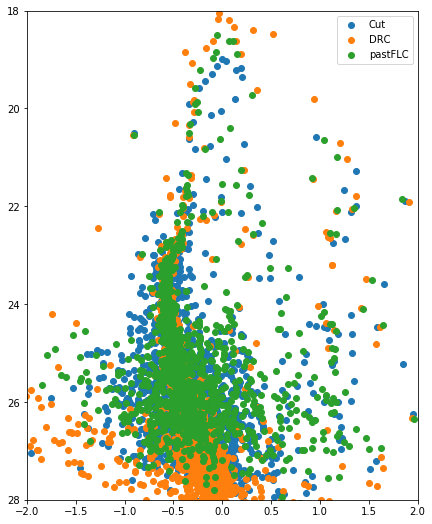

In [107]:
fig, ax = plt.subplots(figsize=(7,9))

ax.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='Cut')
ax.scatter(full_drc['magRaw_v']-full_drc['magRaw_i'],\
           full_drc['magRaw_v'],label='DRC')
ax.scatter(past_flc['mean_f606w']-past_flc['mean_f814w'],\
           past_flc['mean_f606w'],label='pastFLC')

ax.set_ylim(28,18)
ax.set_xlim(-2,2)
ax.legend()
plt.show()

In [21]:
# for every point, get the new mean, sigma-clipped magnitude
sc_mean_814 = np.empty((len(data),1))
for ss in range(len(data)):
    temp_arr = np.array([mag1_814_corr_arr[ss],mag2_814_corr_arr[ss],\
                                           mag3_814_corr_arr[ss],mag4_814_corr_arr[ss]])
    sc_mean_814[ss] = np.mean(stats.sigmaclip(temp_arr,2.,2.)[0])
sc_mean_814=sc_mean_814.flatten()

In [22]:
# for every point, get the new mean, sigma-clipped magnitude
sc_mean_606 = np.zeros((len(data),1))
for ss in range(len(data)):
    temp_arr = np.array([mag1_606_corr_arr[ss],mag2_606_corr_arr[ss],\
                                           mag3_606_corr_arr[ss],mag4_606_corr_arr[ss]])
    sc_mean_606[ss] = np.mean(stats.sigmaclip(temp_arr,2.,2.)[0])
sc_mean_606=sc_mean_606.flatten()

In [90]:
len(sc_mean_606_all)

1336

In [23]:
# for every point, get the new mean magnitude
mean_814 = np.empty((len(data),1))
for ss in range(len(data)):
    temp_arr = np.array([mag1_814_corr_arr[ss],mag2_814_corr_arr[ss],\
                                           mag3_814_corr_arr[ss],mag4_814_corr_arr[ss]])
    mean_814[ss] = np.mean(temp_arr)
mean_814=mean_814.flatten()

In [24]:
# for every point, get the new mean magnitude
mean_606 = np.empty((len(data),1))
for ss in range(len(data)):
    temp_arr = np.array([mag1_606_corr_arr[ss],mag2_606_corr_arr[ss],\
                        mag3_606_corr_arr[ss],mag4_606_corr_arr[ss]])
    mean_606[ss] = np.mean(temp_arr)
mean_606=mean_606.flatten()

In [75]:
len(mean_606)

48

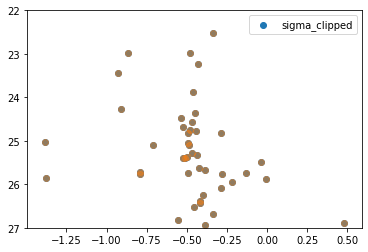

In [33]:
fig, ax = plt.subplots()

ax.scatter(sc_mean_606-sc_mean_814,sc_mean_606,label='sigma_clipped')
ax.scatter(mean_606-mean_814,mean_606,alpha=0.5)

ax.set_ylim(27,22)

ax.legend()

plt.show()

In [28]:
# Sigma clip color
col_arr1 = mag1_606_corr_arr-mag1_814_corr_arr
col_arr3 = mag3_606_corr_arr-mag3_814_corr_arr
col_arr2 = mag2_606_corr_arr-mag2_814_corr_arr
col_arr4 = mag4_606_corr_arr-mag4_814_corr_arr

In [29]:
# getting the mean color of each point
mean_col = np.empty((len(data),1))
for ss in range(len(data)):
    temp_arr = np.array([col_arr1[ss],col_arr2[ss],\
                                           col_arr3[ss],col_arr4[ss]])
    mean_col[ss] = np.mean(stats.sigmaclip(temp_arr,2.,2.)[0])
mean_col = mean_col.flatten()

In [78]:
len(mean_col)

48

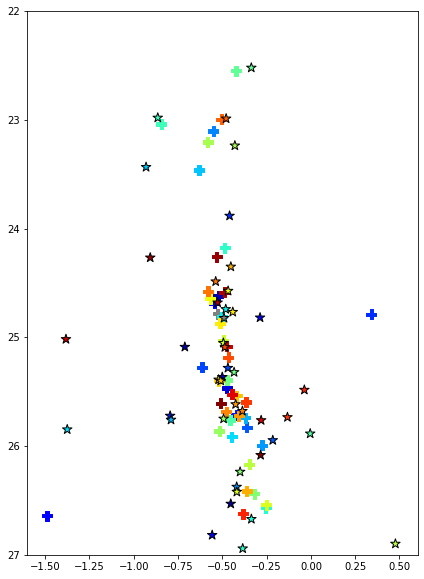

In [77]:
# %matplotlib notebook
fig, ax = plt.subplots(figsize=(7,10))

ax.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',c=index,cmap=cmap,marker='P',s=100)
ax.scatter(sc_mean_606-sc_mean_814,sc_mean_606,c=index,cmap=cmap,marker='*',edgecolor='black',s=100)
# ax.scatter(mag1_606_corr_arr-mag1_814_corr_arr,mag1_606_corr_arr,label='M1',c=index,cmap=cmap,s=15,edgecolor='black')
# ax.scatter(mag2_606_corr_arr-mag2_814_corr_arr,mag2_606_corr_arr,label='M2',c=index,cmap=cmap,s=15,edgecolor='black')
# ax.scatter(mag3_606_corr_arr-mag3_814_corr_arr,mag3_606_corr_arr,label='M3',c=index,cmap=cmap,s=15,edgecolor='black')
# ax.scatter(mag4_606_corr_arr-mag4_814_corr_arr,mag4_606_corr_arr,label='M4',c=index,cmap=cmap,s=15,edgecolor='black')

# ax.legend()

ax.set_ylim(27,22)
plt.show()

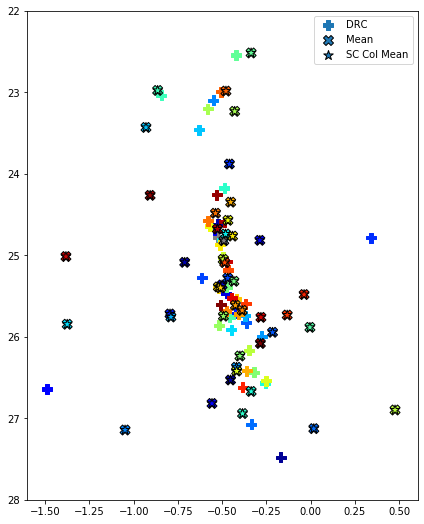

In [34]:
# %matplotlib notebook
fig, ax = plt.subplots(figsize=(7,9))

ax.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',c=index,cmap=cmap,marker='P',s=100)
ax.scatter(mean_606-mean_814,mean_606,c=index,cmap=cmap,marker='X',edgecolor='black',s=100,label='Mean')
ax.scatter(mean_col,mean_606,c=index,cmap=cmap,marker='*',edgecolor='black',s=100,label='SC Col Mean')
# ax.scatter(sc_mean_606-sc_mean_814,sc_mean_606,c=index,cmap=cmap,marker='*',edgecolor='black',s=100)

# ax.scatter(mag1_606_corr_arr-mag1_814_corr_arr,mag1_606_corr_arr,label='M1',c=index,cmap=cmap,s=15,edgecolor='black')
# ax.scatter(mag2_606_corr_arr-mag2_814_corr_arr,mag2_606_corr_arr,label='M2',c=index,cmap=cmap,s=15,edgecolor='black')
# ax.scatter(mag3_606_corr_arr-mag3_814_corr_arr,mag3_606_corr_arr,label='M3',c=index,cmap=cmap,s=15,edgecolor='black')
# ax.scatter(mag4_606_corr_arr-mag4_814_corr_arr,mag4_606_corr_arr,label='M4',c=index,cmap=cmap,s=15,edgecolor='black')

ax.legend()

ax.set_ylim(28,22)

plt.show()

In [30]:
# %matplotlib notebook
# fig, ax = plt.subplots(figsize=(7,10))

# # ax.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',c=index,cmap=cmap,marker='P',s=100)
# ax.scatter(sc_mean_606-sc_mean_814,sc_mean_606,c=index,cmap=cmap,marker='*',edgecolor='black',s=100)
# ax.scatter(mag1_606_corr_arr-mag1_814_corr_arr,mag1_606_corr_arr,label='M1',c=index,cmap=cmap,s=15,edgecolor='black')
# ax.scatter(mag2_606_corr_arr-mag2_814_corr_arr,mag2_606_corr_arr,label='M2',c=index,cmap=cmap,s=15,edgecolor='black')
# ax.scatter(mag3_606_corr_arr-mag3_814_corr_arr,mag3_606_corr_arr,label='M3',c=index,cmap=cmap,s=15,edgecolor='black')
# ax.scatter(mag4_606_corr_arr-mag4_814_corr_arr,mag4_606_corr_arr,label='M4',c=index,cmap=cmap,s=15,edgecolor='black')

# # ax.legend()

# ax.set_ylim(28,22)

# plt.show()

In [31]:
%matplotlib inline

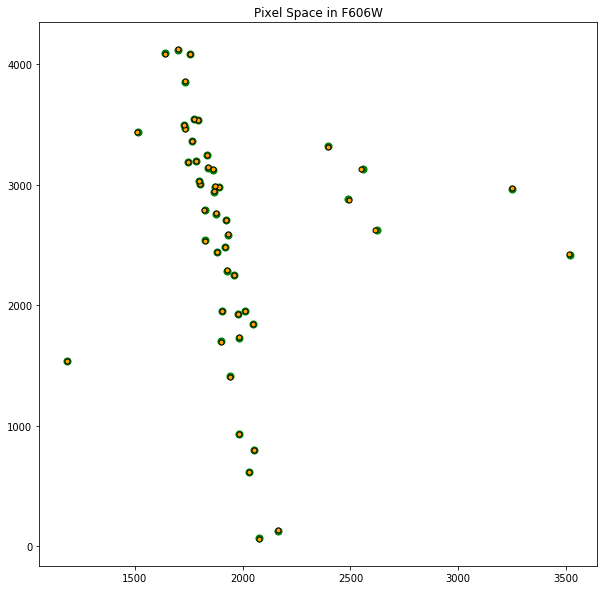

In [32]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(drc_all['x_v'],drc_all['y_v'],label='DRC',s=50,color='green')
ax.scatter(flc_up['xdrc_up_f606w'],flc_up['ydrc_up_f606w'],s=25,color='orange',edgecolor='black')
ax.scatter(flc_low['xdrc_low_f606w'],flc_low['ydrc_low_f606w'],s=25,color='orange',edgecolor='black')
# ax.scatter(psf['x'],psf['y'])

ax.set_title('Pixel Space in F606W')
plt.show()

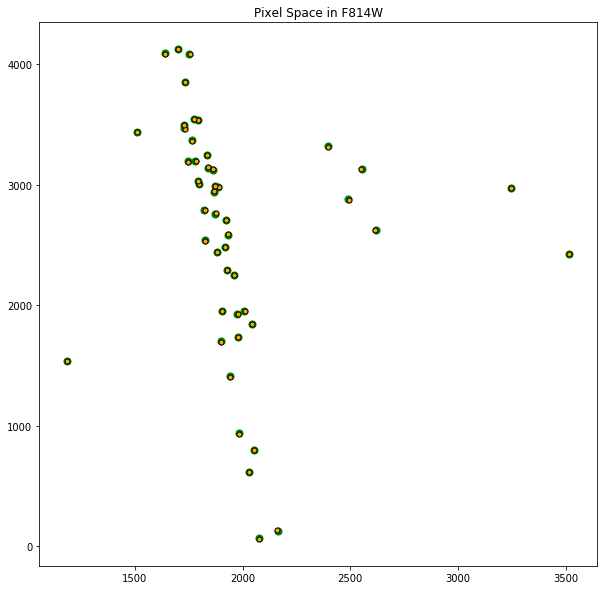

In [33]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(drc_all['x_i'],drc_all['y_i'],label='DRC',s=50,color='green')
ax.scatter(flc_up['xdrc_up_f814w'],flc_up['ydrc_up_f814w'],s=25,color='orange',edgecolor='black')
ax.scatter(flc_low['xdrc_low_f814w'],flc_low['ydrc_low_f814w'],s=25,color='orange',edgecolor='black')

ax.set_title('Pixel Space in F814W')
plt.show()

In [35]:
mbins = np.arange(22, 26, 0.5)

In [36]:
# getting the colors and creating bins based on magnitude

color1=data['mag1_f606w']-data['mag1_f814w']
dig_m1 = np.digitize(data['mag1_f606w'], mbins)

color2=data['mag2_f606w']-data['mag2_f814w']
dig_m2 = np.digitize(data['mag2_f606w'], mbins)

color3=data['mag3_f606w']-data['mag3_f814w']
dig_m3 = np.digitize(data['mag3_f606w'], mbins)

color4=data['mag4_f606w']-data['mag4_f814w']
dig_m4 = np.digitize(data['mag4_f606w'], mbins)

colorD = data['magDRC_f606w']-data['magDRC_f814w']
dig_mD = np.digitize(data['magDRC_f606w'], mbins)

In [66]:
len(colmeans)

4

In [79]:
dig_mC = np.digitize(mean_606, mbins)

In [80]:
col_meanC = np.zeros((len(mbins)-1))
for ii in range(1,len(mbins)):
    col_meanC[ii-1] = np.median(mean_col[np.argwhere(dig_mC==ii)])

In [37]:
colorP = psf['m606c']-psf['m814c']
dig_mP = np.digitize(psf['m606c'], mbins)
colorA = aper['m606c']-aper['m814c']
dig_mA = np.digitize(aper['m606c'], mbins)

In [38]:
# finding the median colors of each magnitude bin for the PSF and APER data

col_meanP = np.zeros((len(mbins)-1))
col_meanA = np.zeros((len(mbins)-1))
for ii in range(1,len(mbins)):
    col_meanP[ii-1] = np.median(colorP[np.argwhere(dig_mP==ii)])
    col_meanA[ii-1] = np.median(colorA[np.argwhere(dig_mA==ii)])

In [39]:
# finding the median colors of each magnitude bin for the four FLCs and DRC

col_mean1 = np.zeros((len(mbins)-1))
col_mean2 = np.zeros((len(mbins)-1))
col_mean3 = np.zeros((len(mbins)-1))
col_mean4 = np.zeros((len(mbins)-1))
col_meanD = np.zeros((len(mbins)-1))
for ii in range(1,len(mbins)):
    col_mean1[ii-1] = np.median(color1[np.argwhere(dig_m1==ii)])
    col_mean2[ii-1] = np.median(color2[np.argwhere(dig_m2==ii)])
    col_mean3[ii-1] = np.median(color3[np.argwhere(dig_m3==ii)])
    col_mean4[ii-1] = np.median(color4[np.argwhere(dig_m4==ii)])
    col_meanD[ii-1] = np.median(colorD[np.argwhere(dig_mD==ii)])

/Users/hr8jz/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [62]:
# bin_means = [data['mag1_f606w'][dig_m1== i].mean() for i in range(1, len(mbins))]

/Users/hr8jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.


In [63]:
bin_means = mbins[1:]
print(bin_means)

[22.5 23.  23.5 24.  24.5 25.  25.5]


In [64]:
colmeans = np.array([col_mean1,col_mean2,col_mean3,col_mean4])

In [67]:
colmeans=np.nanmean(colmeans,axis=0)

# print(np.nanmean(colmeans,axis=0))

/Users/hr8jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [68]:
len(colmeans)

7

In [69]:
len(bin_means)

7

In [73]:
col_meanD

array([      nan, -0.46417 , -0.6069  ,       nan, -0.509625, -0.52275 ,
       -0.47578 ])

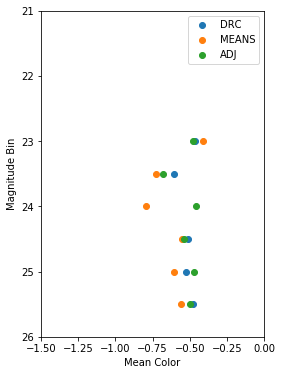

In [81]:
fig,ax = plt.subplots(figsize=(4,6))

# ax.scatter(col_mean1,bin_means,label='M1',alpha=1)
# ax.scatter(col_mean2,bin_means,label='M2',alpha=1)
# ax.scatter(col_mean3,bin_means,label='M3',alpha=1)
# ax.scatter(col_mean4,bin_means,label='M4',alpha=1)
ax.scatter(col_meanD,bin_means,label='DRC',alpha=1)
# ax.scatter(col_meanP,bin_means,label='PSF',alpha=1)
# ax.scatter(col_meanA,bin_means,label='APER',alpha=1)
ax.scatter(colmeans,bin_means,label='MEANS',alpha=1)
ax.scatter(col_meanC,bin_means,label='ADJ',alpha=1)


ax.legend()
ax.set_xlabel('Mean Color')
ax.set_ylabel('Magnitude Bin')
ax.set_ylim(26,21)
ax.set_xlim(-1.5,0.)

plt.show()

In [42]:
colmeans = np.array([col_mean1,col_mean2,col_mean3,col_mean4])
print(np.std(colmeans,axis=0))

[       nan 0.07526174 0.12796796 0.0519784  0.07934793 0.01191625
 0.06220585]


In [43]:
drc_1 = col_meanD - col_mean1
drc_2 = col_meanD - col_mean2
drc_3 = col_meanD - col_mean3
drc_4 = col_meanD - col_mean4

In [44]:
psf_1 = col_meanP - col_mean1
psf_2 = col_meanP - col_mean2
psf_3 = col_meanP - col_mean3
psf_4 = col_meanP - col_mean4

aper_1 = col_meanA - col_mean1
aper_2 = col_meanA - col_mean2
aper_3 = col_meanA - col_mean3
aper_4 = col_meanA - col_mean4

In [45]:
drc_p = col_meanD - col_meanP
drc_a = col_meanD - col_meanA

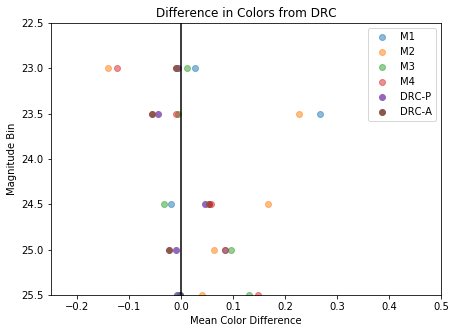

In [46]:
fig,ax = plt.subplots(figsize=(7,5))

ax.scatter(drc_1,bin_means,label='M1',alpha=0.5)
ax.scatter(drc_2,bin_means,label='M2',alpha=0.5)
ax.scatter(drc_3,bin_means,label='M3',alpha=0.5)
ax.scatter(drc_4,bin_means,label='M4',alpha=0.5)

# ax.scatter(psf_1,bin_means,label='P1',alpha=0.5,marker='P')
# ax.scatter(psf_2,bin_means,label='P2',alpha=0.5,marker='P')
# ax.scatter(psf_3,bin_means,label='P3',alpha=0.5,marker='P')
# ax.scatter(psf_4,bin_means,label='P4',alpha=0.5,marker='P')

# ax.scatter(aper_1,bin_means,label='A1',alpha=0.5,marker='*')
# ax.scatter(aper_2,bin_means,label='A2',alpha=0.5,marker='*')
# ax.scatter(aper_3,bin_means,label='A3',alpha=0.5,marker='*')
# ax.scatter(aper_4,bin_means,label='A4',alpha=0.5,marker='*')

ax.scatter(drc_p,bin_means,label='DRC-P',zorder=0)
ax.scatter(drc_a,bin_means,label='DRC-A',zorder=0)

ax.legend()
ax.set_xlabel('Mean Color Difference')
ax.set_ylabel('Magnitude Bin')
ax.set_ylim(25.5,22.5)
ax.vlines(0.0,20,26)
ax.set_title('Difference in Colors from DRC')
# ax.set_xlim(-0.25,0.5)
ax.set_xlim(-0.25,0.5)

plt.show()

In [47]:
# mean_arr = np.array([np.nanmean(psf_1),np.nanmean(psf_2),np.nanmean(psf_3),np.nanmean(psf_4)])
# avg_psf_dif = np.nanmean(mean_arr)

In [48]:
psf_arr=np.vstack((psf_1,psf_2,psf_3,psf_4))
mean_psf_arr = np.nanmean(psf_arr,axis=0)

/Users/hr8jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [49]:
drc_arr=np.vstack((drc_1,drc_2,drc_3,drc_4))
mean_drc_arr = np.nanmean(drc_arr,axis=0)

/Users/hr8jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


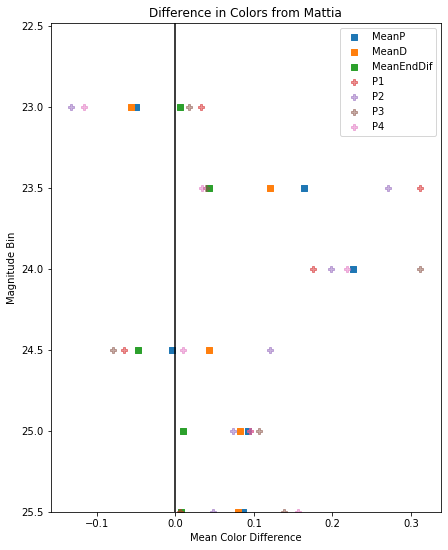

In [50]:
fig,ax = plt.subplots(figsize=(7,9))

# ax.scatter(drc_1,bin_means,label='M1',alpha=0.5)
# ax.scatter(drc_2,bin_means,label='M2',alpha=0.5)
# ax.scatter(drc_3,bin_means,label='M3',alpha=0.5)
# ax.scatter(drc_4,bin_means,label='M4',alpha=0.5)
ax.scatter(mean_psf_arr,bin_means,label='MeanP',marker='s',zorder=0)
ax.scatter(mean_drc_arr,bin_means,label='MeanD',marker='s',zorder=0)

ax.scatter(mean_psf_arr-mean_drc_arr,bin_means,label='MeanEndDif',marker='s',zorder=0)

ax.scatter(psf_1,bin_means,label='P1',alpha=0.5,marker='P')
ax.scatter(psf_2,bin_means,label='P2',alpha=0.5,marker='P')
ax.scatter(psf_3,bin_means,label='P3',alpha=0.5,marker='P')
ax.scatter(psf_4,bin_means,label='P4',alpha=0.5,marker='P')



# ax.scatter(aper_1,bin_means,label='A1',alpha=0.5,marker='*')
# ax.scatter(aper_2,bin_means,label='A2',alpha=0.5,marker='*')
# ax.scatter(aper_3,bin_means,label='A3',alpha=0.5,marker='*')
# ax.scatter(aper_4,bin_means,label='A4',alpha=0.5,marker='*')

# ax.scatter(drc_p,bin_means,label='DRC-P',zorder=0)
# ax.scatter(drc_a,bin_means,label='DRC-A',zorder=0)

ax.legend()
ax.set_xlabel('Mean Color Difference')
ax.set_ylabel('Magnitude Bin')
ax.set_ylim(25.5,22.48)
ax.vlines(0.0,20,26)
ax.set_title('Difference in Colors from Mattia')
# ax.set_xlim(-0.25,0.5)

plt.show()

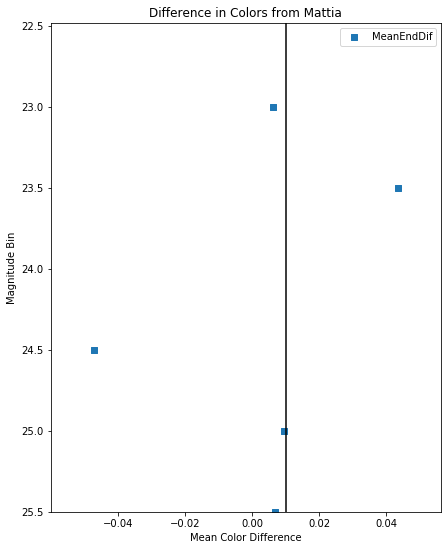

In [51]:
fig,ax = plt.subplots(figsize=(7,9))

# ax.scatter(mean_psf_arr,bin_means,label='MeanP',marker='s',zorder=0)
# ax.scatter(mean_drc_arr,bin_means,label='MeanD',marker='s',zorder=0)

ax.scatter(mean_psf_arr-mean_drc_arr,bin_means,label='MeanEndDif',marker='s',zorder=0)

# ax.scatter(psf_1,bin_means,label='P1',alpha=0.5,marker='P')
# ax.scatter(psf_2,bin_means,label='P2',alpha=0.5,marker='P')
# ax.scatter(psf_3,bin_means,label='P3',alpha=0.5,marker='P')
# ax.scatter(psf_4,bin_means,label='P4',alpha=0.5,marker='P')



ax.legend()
ax.set_xlabel('Mean Color Difference')
ax.set_ylabel('Magnitude Bin')
ax.set_ylim(25.5,22.48)
ax.vlines(0.01,20,26)
ax.set_title('Difference in Colors from Mattia')
# ax.set_xlim(-0.25,0.5)

plt.show()

In [52]:
print('Mean:',np.nanmean(mean_psf_arr-mean_drc_arr))
print('Median:',np.nanmedian(mean_psf_arr-mean_drc_arr))

Mean: 0.0037749999999988405
Median: 0.00677999999999912


In [53]:
print('Mean:',np.nanmean(drc_1))
print('Median:',np.nanmedian(drc_1))
print('Mean:',np.nanmean(drc_2))
print('Median:',np.nanmedian(drc_2))
print('Mean:',np.nanmean(drc_3))
print('Median:',np.nanmedian(drc_3))
print('Mean:',np.nanmean(drc_4))
print('Median:',np.nanmedian(drc_4))

Mean: 0.07189200000000077
Median: 0.026949999999999363
Mean: 0.07211600000000082
Median: 0.06375500000000223
Mean: 0.04038299999999957
Median: 0.011060000000000514
Mean: 0.03190000000000133
Median: 0.05708500000000072


In [54]:
print('Mean:',np.nanmean(drc_p))
print('Median:',np.nanmedian(drc_p))
print('Mean:',np.nanmean(drc_a))
print('Median:',np.nanmedian(drc_a))

Mean: -0.0037749999999988405
Median: -0.00677999999999912
Mean: -0.0068950000000000955
Median: -0.00846999999999909


In [55]:
print('Mean:',np.nanmean(psf_1))
print('Median:',np.nanmedian(psf_1))
print('Mean:',np.nanmean(psf_2))
print('Median:',np.nanmedian(psf_2))
print('Mean:',np.nanmean(psf_3))
print('Median:',np.nanmedian(psf_3))
print('Mean:',np.nanmean(psf_4))
print('Median:',np.nanmedian(psf_4))

Mean: 0.09228749999999941
Median: 0.0640049999999972
Mean: 0.09615749999999974
Median: 0.0969224999999998
Mean: 0.08878333333333217
Median: 0.07259999999999867
Mean: 0.06619000000000004
Median: 0.06448250000000133


In [56]:
print('Mean:',np.nanmean(aper_1))
print('Median:',np.nanmedian(aper_1))
print('Mean:',np.nanmean(aper_2))
print('Median:',np.nanmedian(aper_2))
print('Mean:',np.nanmean(aper_3))
print('Median:',np.nanmedian(aper_3))
print('Mean:',np.nanmean(aper_4))
print('Median:',np.nanmedian(aper_4))

Mean: 0.09512916666666715
Median: 0.0717800000000004
Mean: 0.09899916666666748
Median: 0.10014750000000294
Mean: 0.09162499999999991
Median: 0.08512499999999967
Mean: 0.06903166666666778
Median: 0.07700750000000234


In [57]:
median_flc_606 = np.nanmedian(np.array([data['mag1_f606w'],data['mag2_f606w'],data['mag3_f606w'],\
                                        data['mag4_f606w']]),axis=0)

In [58]:
median_flc_814 = np.nanmedian(np.array([data['mag1_f814w'],data['mag2_f814w'],data['mag3_f814w'],\
                                        data['mag4_f814w']]),axis=0)

In [59]:
median_flc_606.shape

(48,)

No handles with labels found to put in legend.


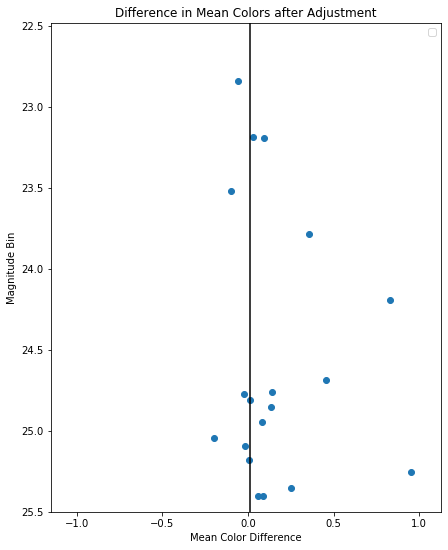

In [60]:
fig,ax = plt.subplots(figsize=(7,9))

# ax.scatter(mean_psf_arr,bin_means,label='MeanP',marker='s',zorder=0)
# ax.scatter(mean_drc_arr,bin_means,label='MeanD',marker='s',zorder=0)

# ax.scatter(mean_psf_arr-mean_drc_arr,bin_means,label='MeanEndDif',marker='s',zorder=0)
ax.scatter((data['magDRC_f606w']-data['magDRC_f814w'])-(median_flc_606-median_flc_814),data['mag1_f606w'])


ax.legend()
ax.set_xlabel('Mean Color Difference')
ax.set_ylabel('Magnitude Bin')
ax.set_ylim(25.5,22.48)
ax.vlines(0.01,20,26)
ax.set_title('Difference in Mean Colors after Adjustment')
# ax.set_xlim(-0.25,0.5)

plt.show()

In [61]:
data1 = data[data['stdev_f606w']<0.1]
median_flc_606_1 = np.nanmedian(np.array([data1['mag1_f606w'],data1['mag2_f606w'],data1['mag3_f606w'],\
                                        data1['mag4_f606w']]),axis=0)
median_flc_814_1 = np.nanmedian(np.array([data1['mag1_f814w'],data1['mag2_f814w'],data1['mag3_f814w'],\
                                        data1['mag4_f814w']]),axis=0)

In [62]:
val = (data1['magDRC_f606w']-data1['magDRC_f814w'])-(median_flc_606_1-median_flc_814_1)

print('Mean:',np.nanmean(val))
print('Median:',np.nanmedian(val))

Mean: 0.12963011627906942
Median: 0.057030000000001024


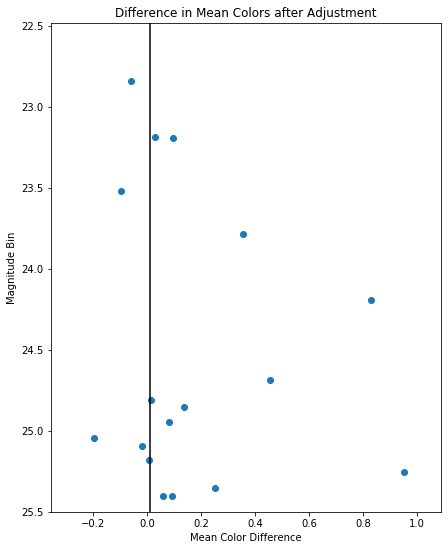

In [63]:
fig,ax = plt.subplots(figsize=(7,9))

# ax.scatter(mean_psf_arr,bin_means,label='MeanP',marker='s',zorder=0)
# ax.scatter(mean_drc_arr,bin_means,label='MeanD',marker='s',zorder=0)

# ax.scatter(mean_psf_arr-mean_drc_arr,bin_means,label='MeanEndDif',marker='s',zorder=0)
ax.scatter(val,data1['mag1_f606w'])


# ax.legend()
ax.set_xlabel('Mean Color Difference')
ax.set_ylabel('Magnitude Bin')
ax.set_ylim(25.5,22.48)
ax.vlines(0.01,20,26)
ax.set_title('Difference in Mean Colors after Adjustment')
# ax.set_xlim(-0.25,0.5)

plt.show()

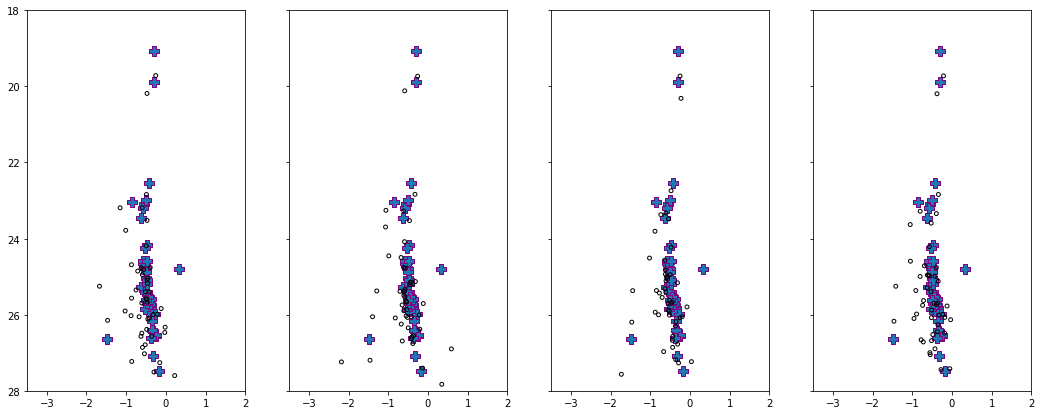

In [64]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18,7),sharey=True,sharex=True)

ax1.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',marker='P',s=100,edgecolor='purple')
ax2.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',marker='P',s=100,edgecolor='purple')
ax3.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',marker='P',s=100,edgecolor='purple')
ax4.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',marker='P',s=100,edgecolor='purple')

ax1.scatter(data['mag1_f606w']-data['mag1_f814w'],data['mag1_f606w'],label='Mag1',\
            s=15,edgecolor='black',facecolor='None')
ax2.scatter(data['mag2_f606w']-data['mag2_f814w'],data['mag2_f606w'],label='Mag2',\
            s=15,edgecolor='black',facecolor='None')
ax3.scatter(data['mag3_f606w']-data['mag3_f814w'],data['mag3_f606w'],label='Mag3',\
            s=15,edgecolor='black',facecolor='None')
ax4.scatter(data['mag4_f606w']-data['mag4_f814w'],data['mag4_f606w'],label='Mag4',\
            s=15,edgecolor='black',facecolor='None')

ax1.set_ylim(28,18)
ax1.set_xlim(-3.5,2)
# ax.legend()

plt.show()

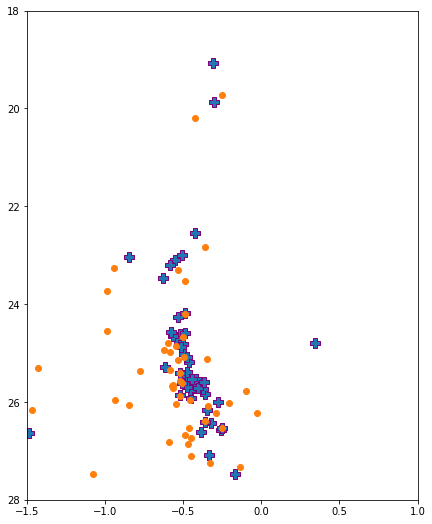

In [65]:
fig,ax = plt.subplots(figsize=(7,9))

# ax.scatter(psf['m606c']-psf['m814c'],psf['m606c'],color='red')
ax.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',marker='P',s=100,edgecolor='purple')
ax.scatter(median_flc_606-median_flc_814,median_flc_606,label='Meds')


ax.set_ylim(28,18)
ax.set_xlim(-1.5,1)
plt.show()


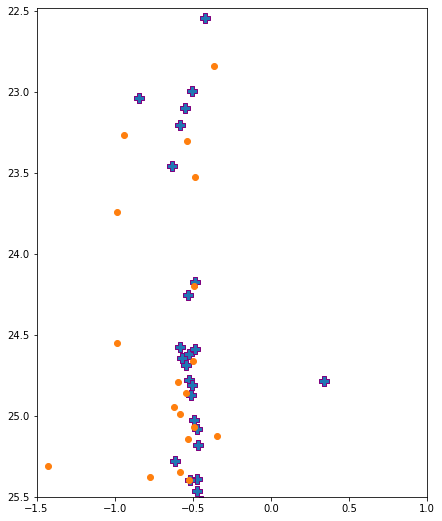

In [66]:
fig,ax = plt.subplots(figsize=(7,9))

ax.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',marker='P',s=100,edgecolor='purple')
ax.scatter(median_flc_606-median_flc_814,median_flc_606,label='Meds')

ax.set_ylim(25.5,22.48)
ax.set_xlim(-1.5,1)
plt.show()


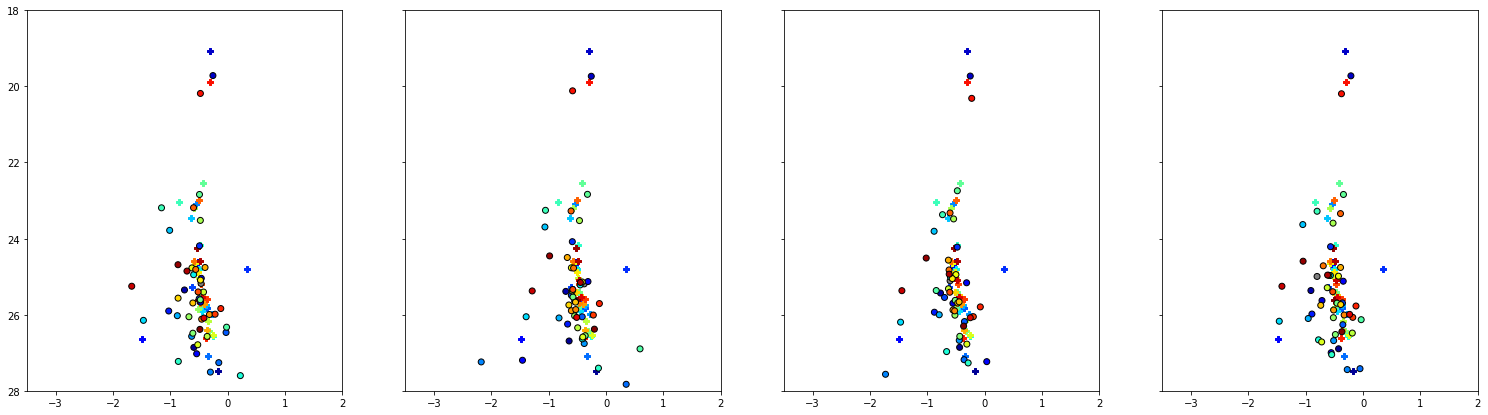

In [67]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(26,7),sharey=True,sharex=True)

ax1.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',c=index,cmap=cmap,marker='P')
ax2.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',c=index,cmap=cmap,marker='P')
ax3.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',c=index,cmap=cmap,marker='P')
ax4.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',c=index,cmap=cmap,marker='P')

ax1.scatter(data['mag1_f606w']-data['mag1_f814w'],data['mag1_f606w'],label='Mag1',c=index,cmap=cmap,edgecolor='black')
ax2.scatter(data['mag2_f606w']-data['mag2_f814w'],data['mag2_f606w'],label='Mag2',c=index,cmap=cmap,edgecolor='black')
ax3.scatter(data['mag3_f606w']-data['mag3_f814w'],data['mag3_f606w'],label='Mag3',c=index,cmap=cmap,edgecolor='black')
ax4.scatter(data['mag4_f606w']-data['mag4_f814w'],data['mag4_f606w'],label='Mag4',c=index,cmap=cmap,edgecolor='black')

ax1.set_ylim(28,18)
ax1.set_xlim(-3.5,2)
# ax.legend()

plt.show()

In [68]:
# fig,ax = plt.subplots(figsize=(7,9))

# # ax.scatter(mean_psf_arr,bin_means,label='MeanP',marker='s',zorder=0)
# # ax.scatter(mean_drc_arr,bin_means,label='MeanD',marker='s',zorder=0)

# # ax.scatter(mean_psf_arr-mean_drc_arr,bin_means,label='MeanEndDif',marker='s',zorder=0)
# ax.scatter(val,data1['mag1_f606w'],c=index,cmap=cmap)


# # ax.legend()
# ax.set_xlabel('Mean Color Difference')
# ax.set_ylabel('Magnitude Bin')
# ax.set_ylim(25.5,22.48)
# ax.vlines(0.01,20,26)
# ax.set_title('Difference in Mean Colors after Adjustment')
# # ax.set_xlim(-0.25,0.5)

# plt.show()

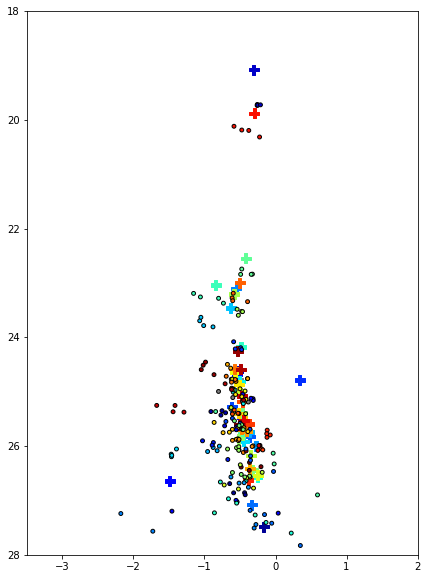

In [69]:
fig,ax = plt.subplots(figsize=(7,10))

ax.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',c=index,\
           cmap=cmap,marker='P',s=100)

ax.scatter(data['mag1_f606w']-data['mag1_f814w'],data['mag1_f606w'],label='Mag1',c=index,cmap=cmap,\
           edgecolor='black',s=15)
ax.scatter(data['mag2_f606w']-data['mag2_f814w'],data['mag2_f606w'],label='Mag2',\
           s=15,c=index,cmap=cmap,edgecolor='black')
ax.scatter(data['mag3_f606w']-data['mag3_f814w'],data['mag3_f606w'],label='Mag3',\
           s=15,c=index,cmap=cmap,edgecolor='black')
ax.scatter(data['mag4_f606w']-data['mag4_f814w'],data['mag4_f606w'],label='Mag4',\
           s=15,c=index,cmap=cmap,edgecolor='black')

ax.set_ylim(28,18)
ax.set_xlim(-3.5,2)
# ax.legend()

plt.show()

<IPython.core.display.Javascript object>


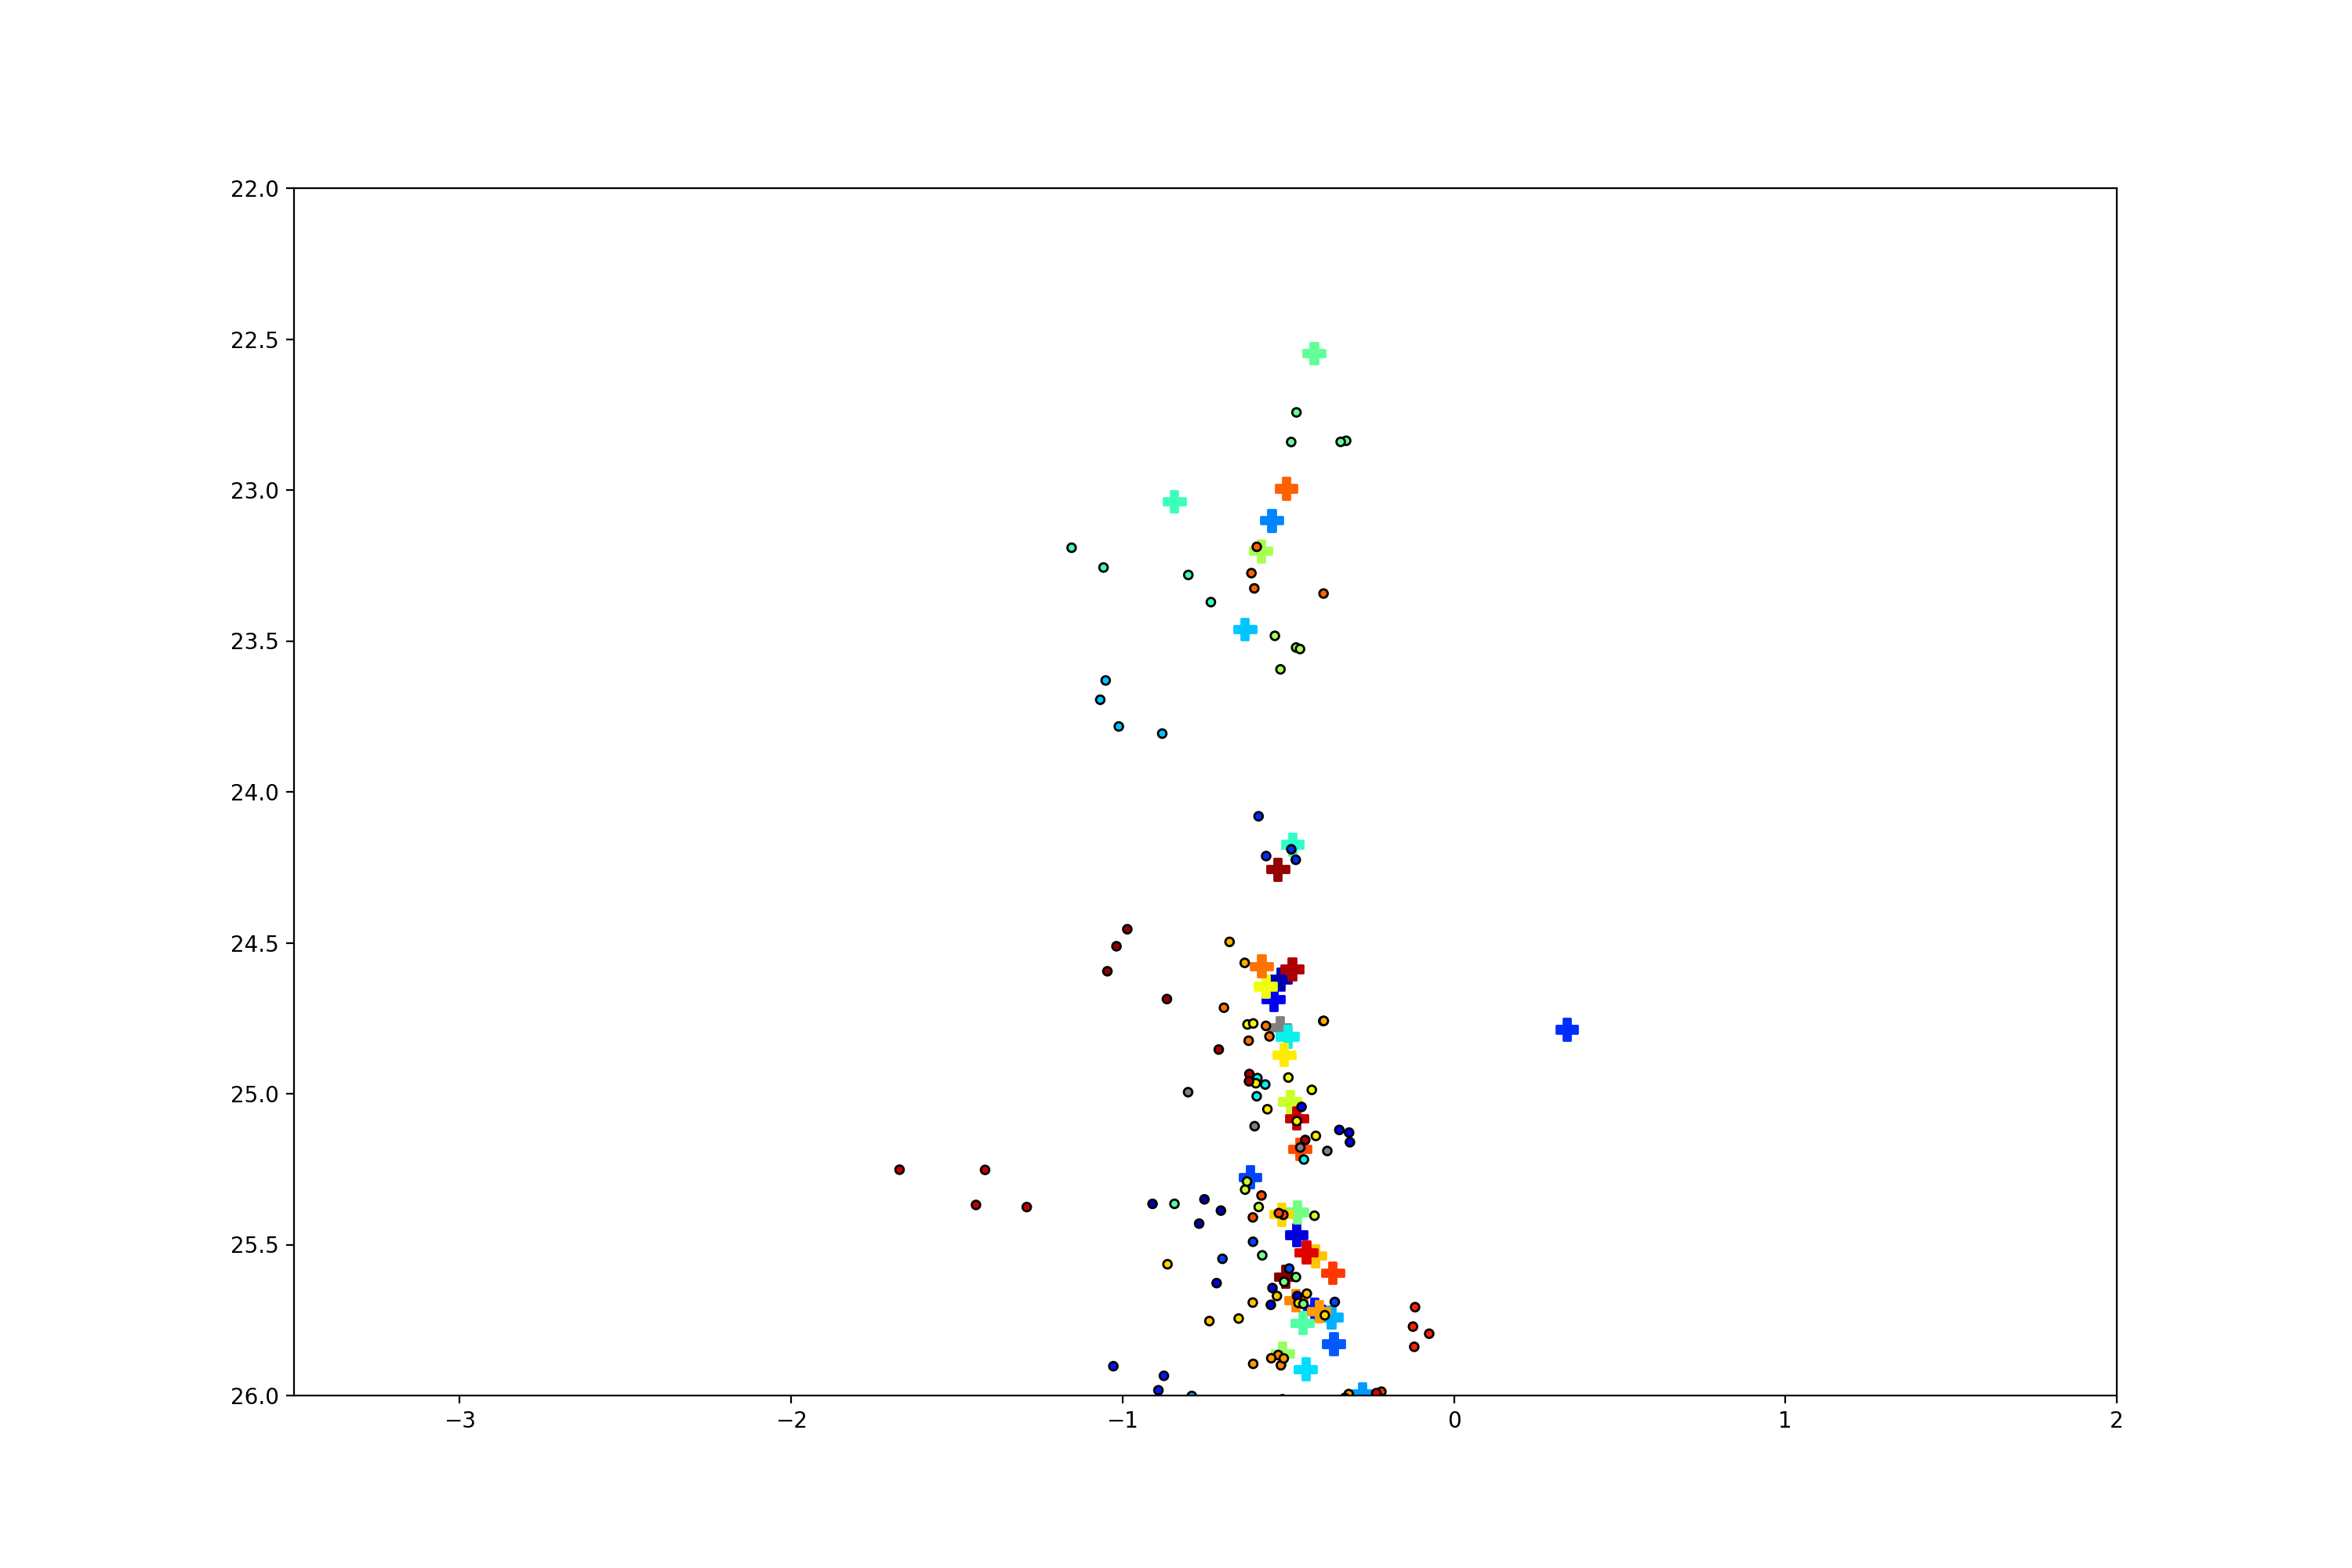

In [70]:
%matplotlib notebook
fig,ax = plt.subplots(figsize=(15,10))

ax.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',c=index,\
           cmap=cmap,marker='P',s=100)

ax.scatter(data['mag1_f606w']-data['mag1_f814w'],data['mag1_f606w'],label='Mag1',c=index,cmap=cmap,\
           edgecolor='black',s=15)
ax.scatter(data['mag2_f606w']-data['mag2_f814w'],data['mag2_f606w'],label='Mag2',\
           s=15,c=index,cmap=cmap,edgecolor='black')
ax.scatter(data['mag3_f606w']-data['mag3_f814w'],data['mag3_f606w'],label='Mag3',\
           s=15,c=index,cmap=cmap,edgecolor='black')
ax.scatter(data['mag4_f606w']-data['mag4_f814w'],data['mag4_f606w'],label='Mag4',\
           s=15,c=index,cmap=cmap,edgecolor='black')

ax.set_ylim(26,22)
ax.set_xlim(-3.5,2)
# ax.legend()

plt.show()

<IPython.core.display.Javascript object>


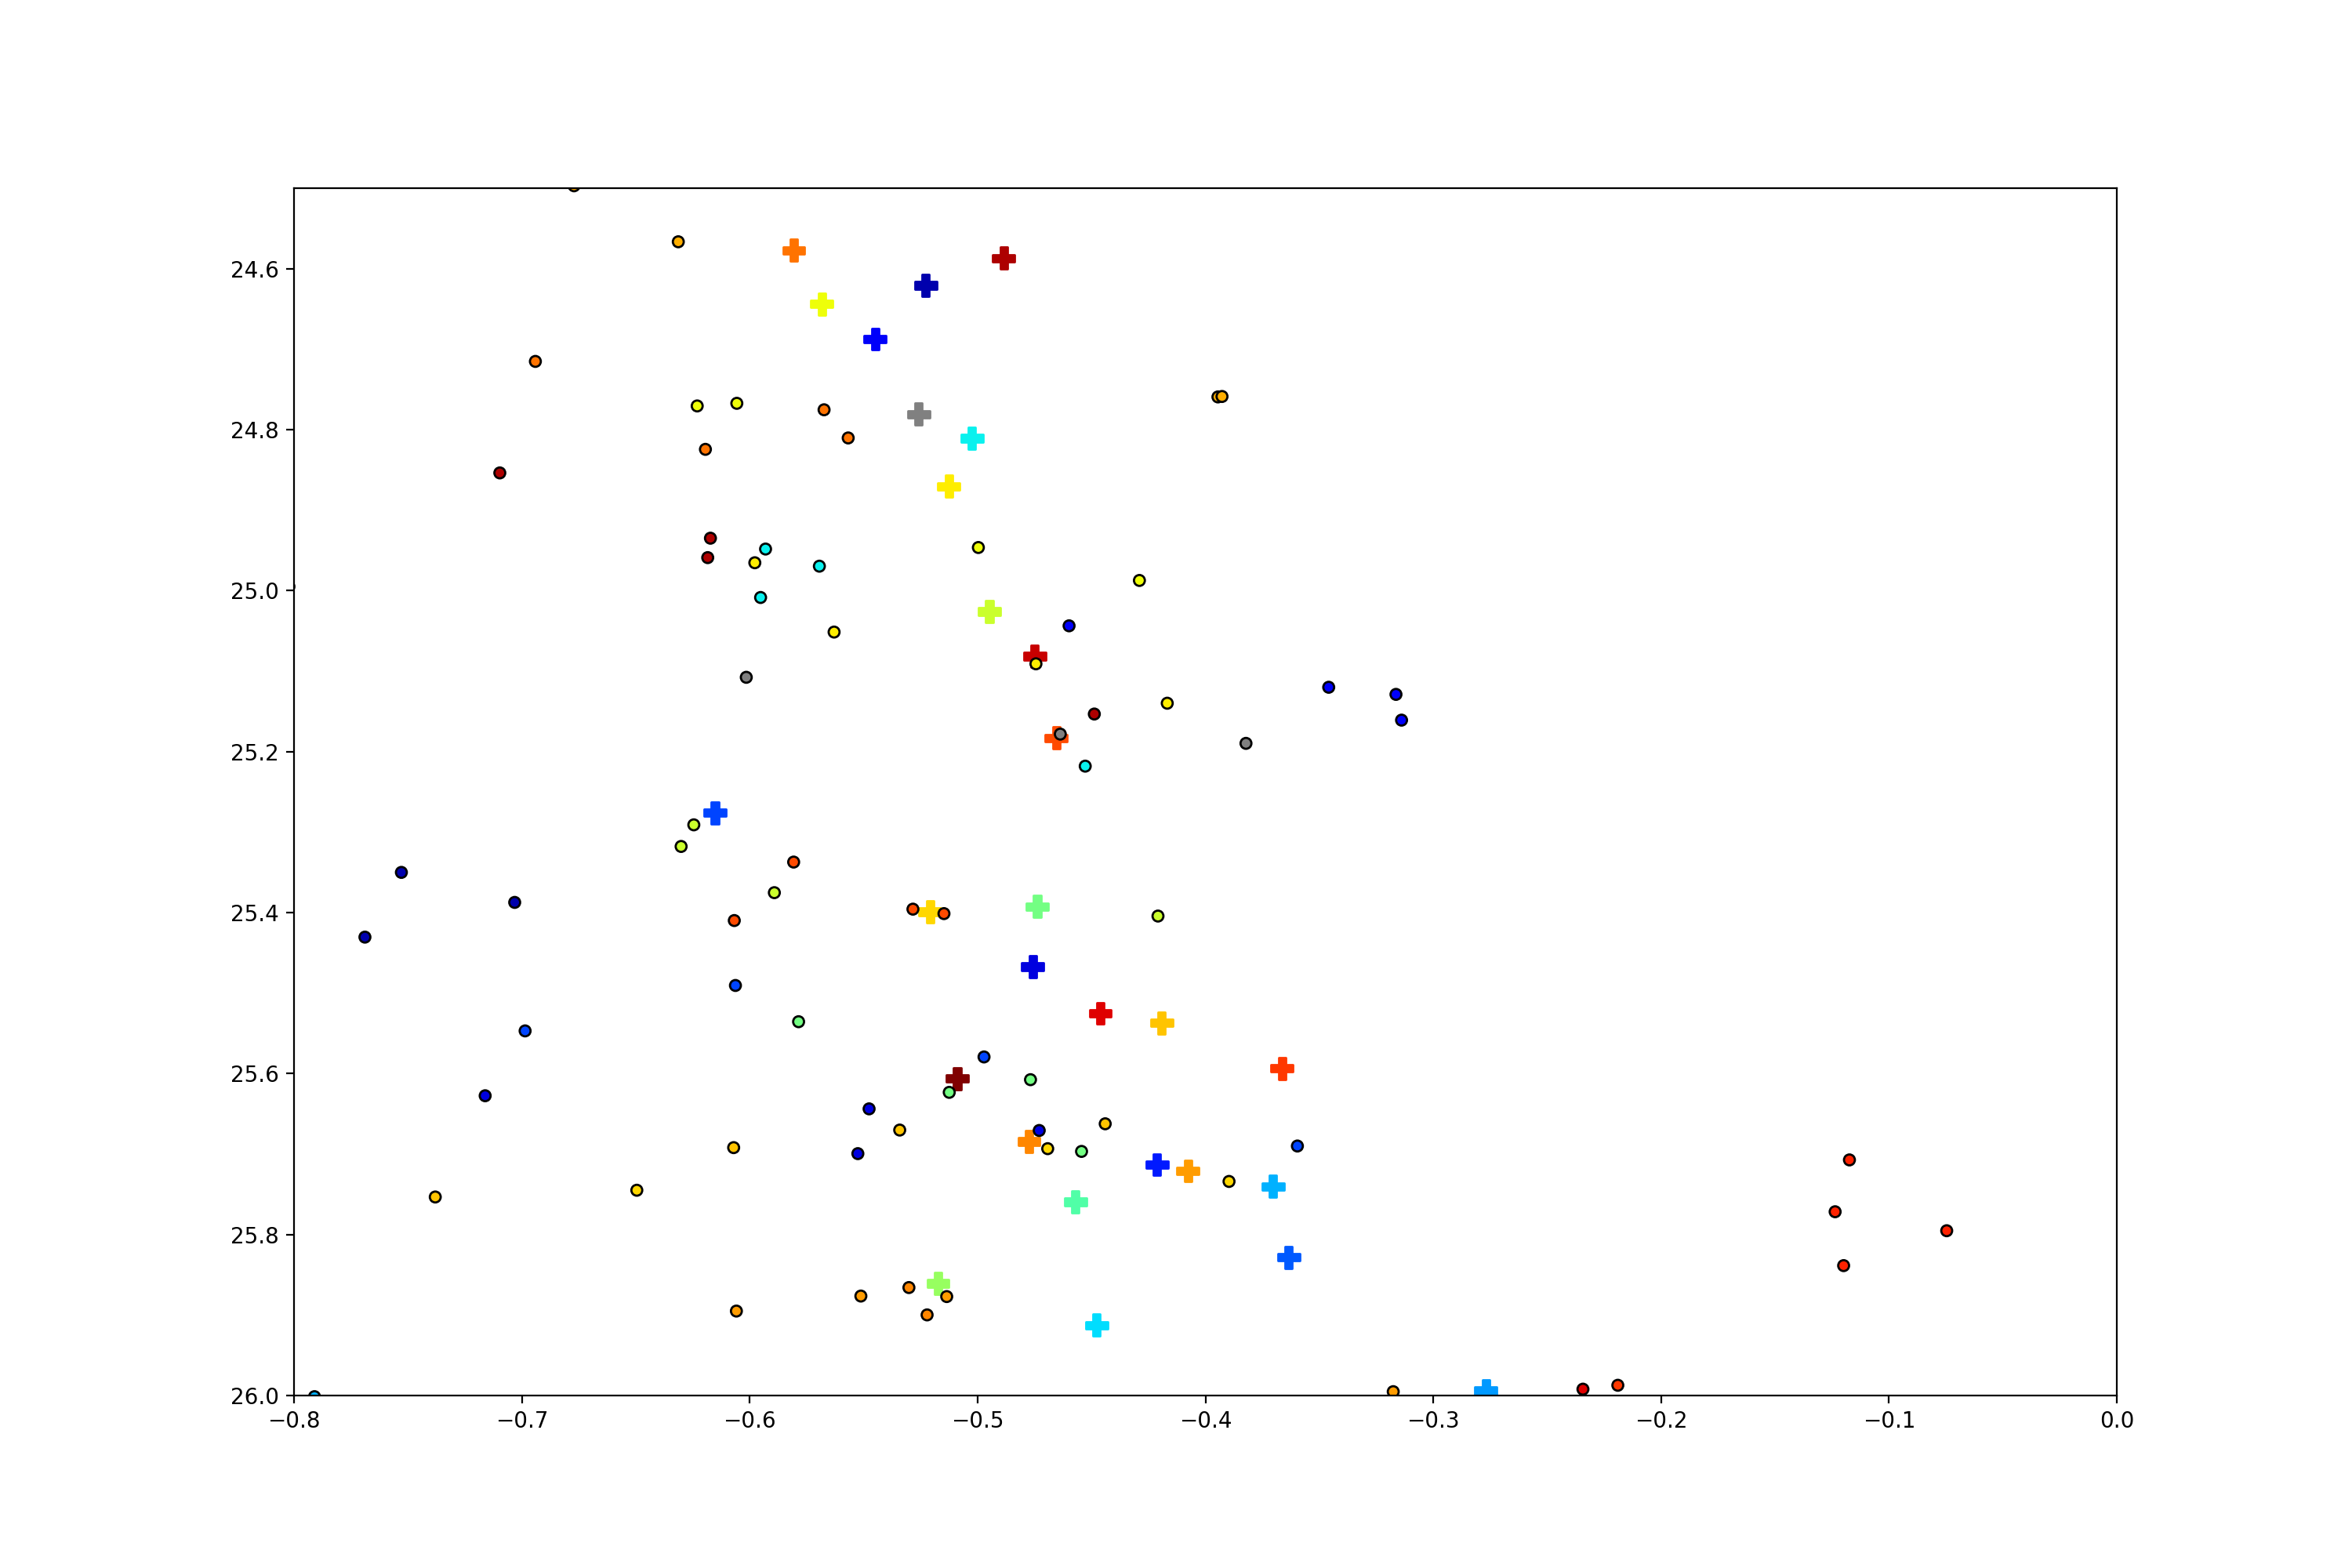

In [71]:
fig,ax = plt.subplots(figsize=(15,10))

ax.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',c=index,\
           cmap=cmap,marker='P',s=100)

ax.scatter(data['mag1_f606w']-data['mag1_f814w'],data['mag1_f606w'],label='Mag1',c=index,cmap=cmap,\
           edgecolor='black',s=25)
ax.scatter(data['mag2_f606w']-data['mag2_f814w'],data['mag2_f606w'],label='Mag2',\
           s=25,c=index,cmap=cmap,edgecolor='black')
ax.scatter(data['mag3_f606w']-data['mag3_f814w'],data['mag3_f606w'],label='Mag3',\
           s=25,c=index,cmap=cmap,edgecolor='black')
ax.scatter(data['mag4_f606w']-data['mag4_f814w'],data['mag4_f606w'],label='Mag4',\
           s=25,c=index,cmap=cmap,edgecolor='black')

ax.set_ylim(26,24.5)
ax.set_xlim(-0.8,0)
# ax.legend()

plt.show()

<IPython.core.display.Javascript object>


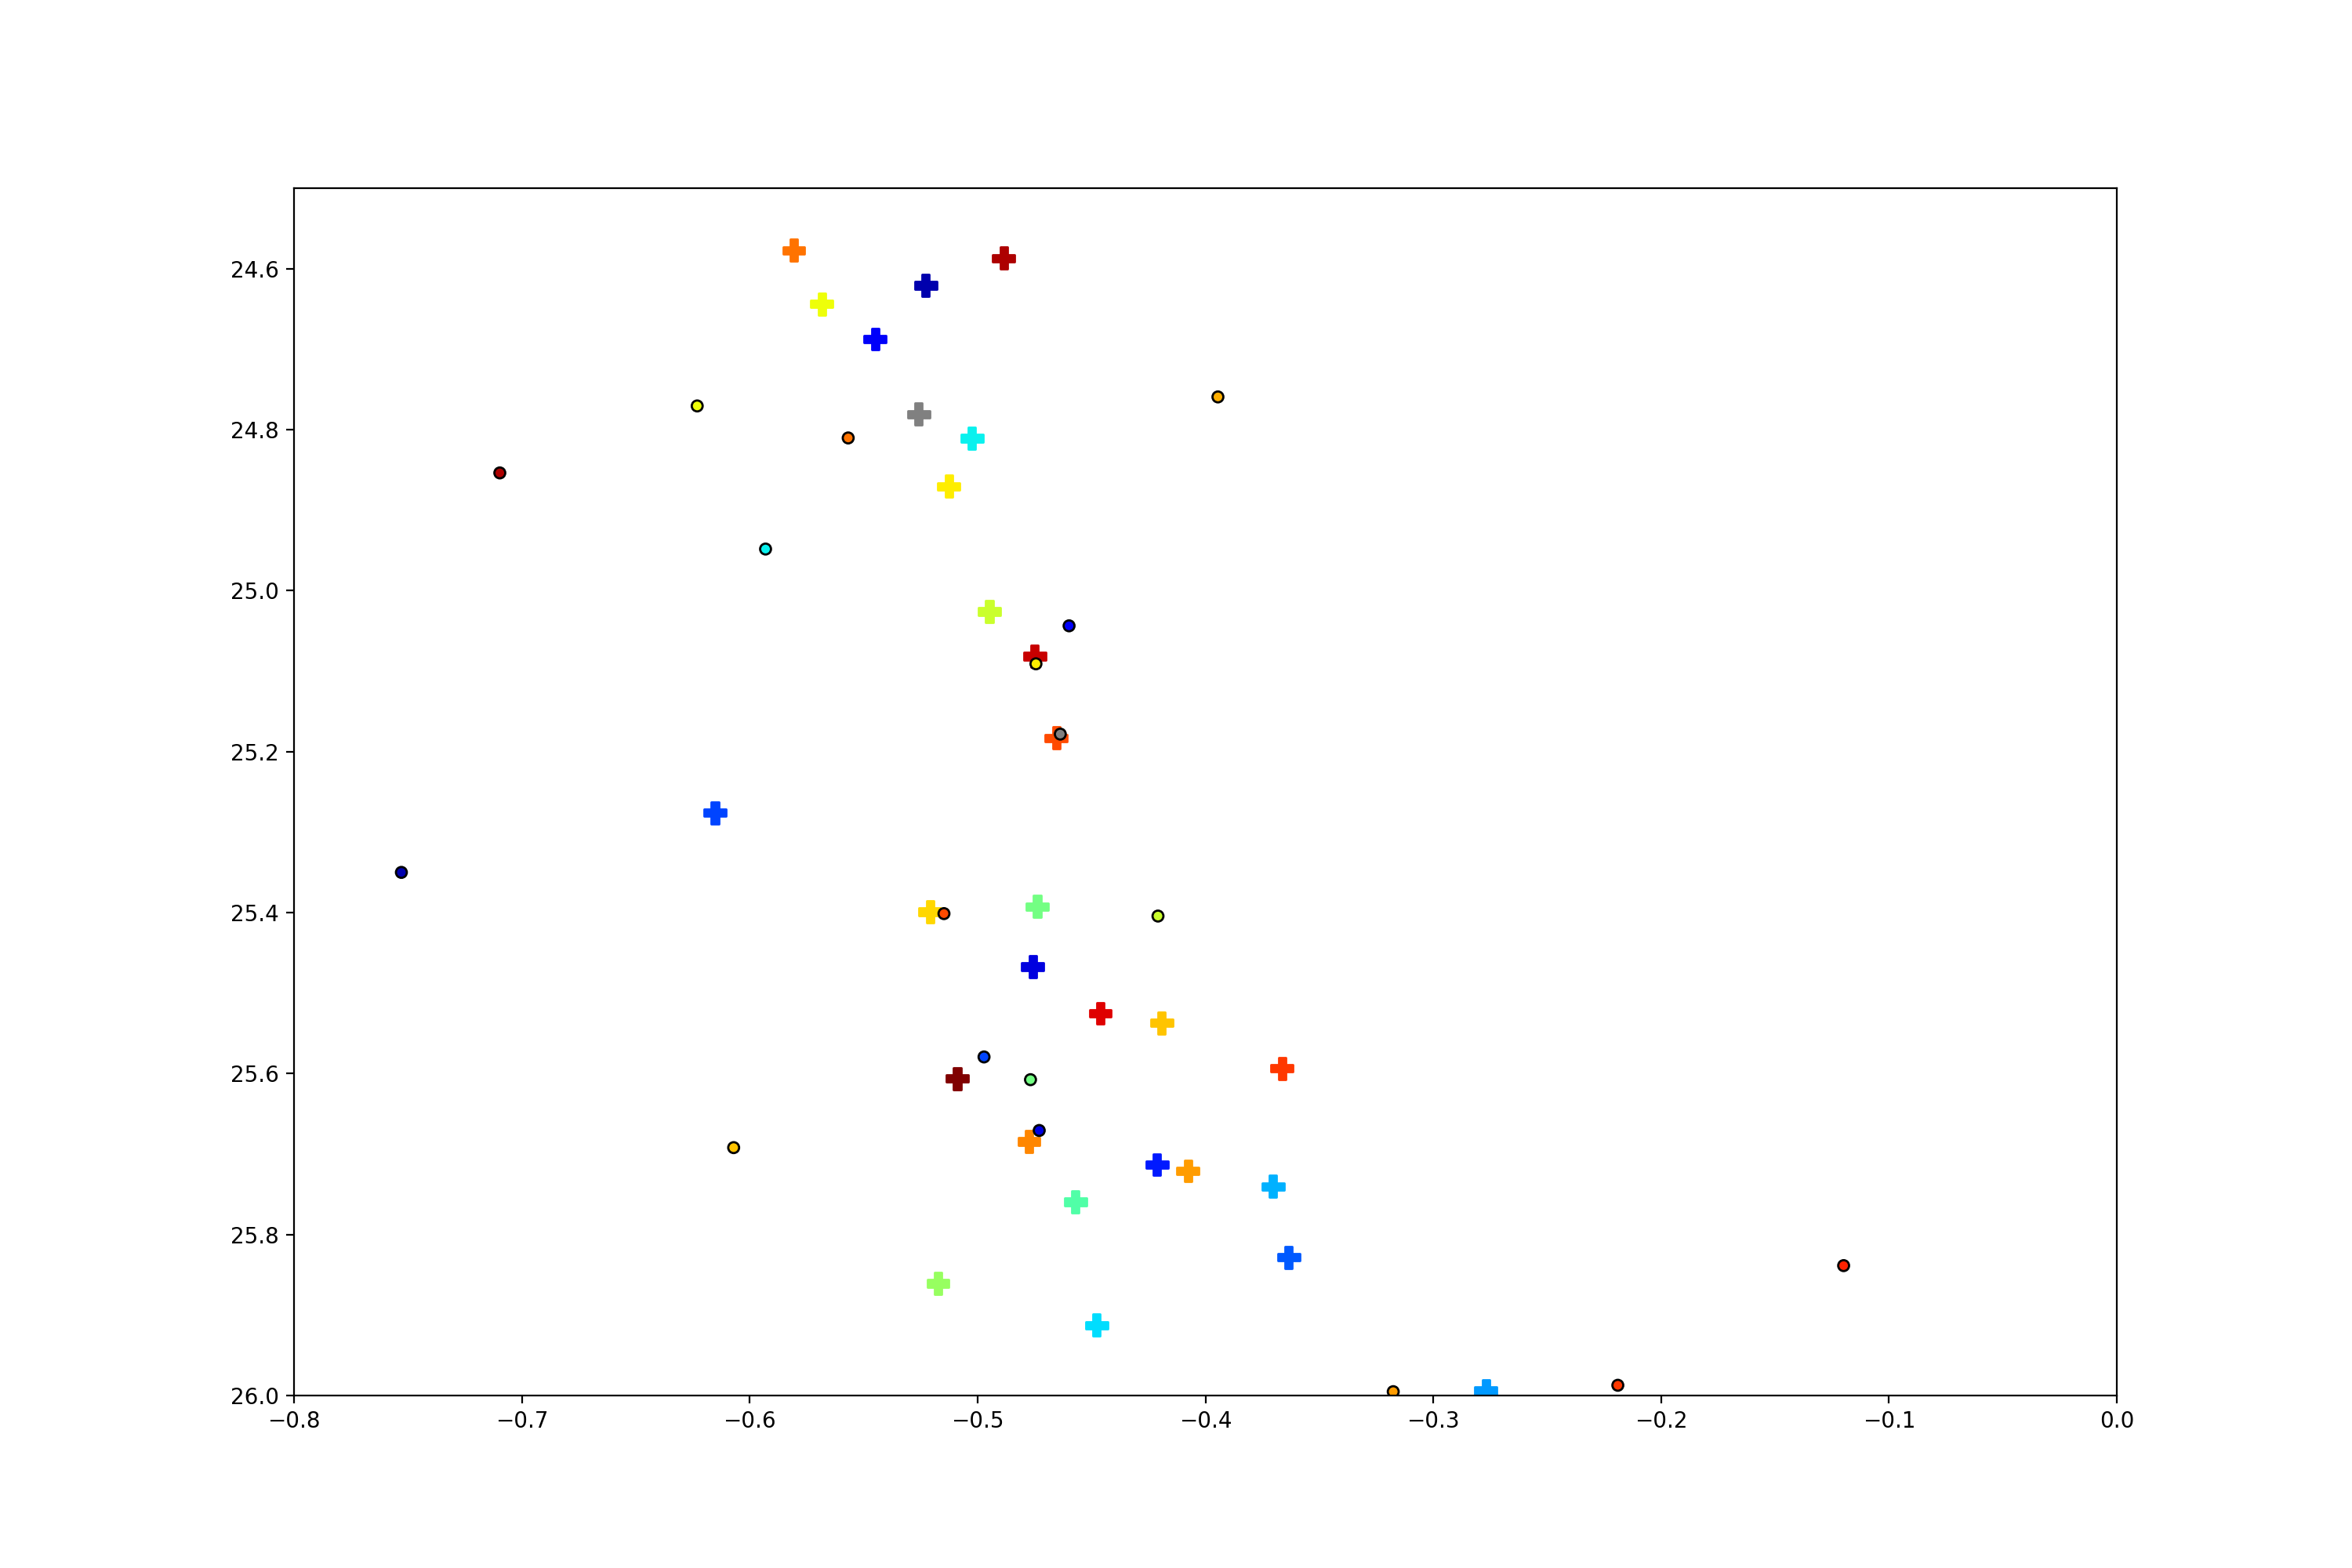

In [72]:
fig,ax = plt.subplots(figsize=(15,10))

ax.scatter(data['magDRC_f606w']-data['magDRC_f814w'],data['magDRC_f606w'],label='DRC',c=index,\
           cmap=cmap,marker='P',s=100)

ax.scatter(data['mag1_f606w']-data['mag1_f814w'],data['mag1_f606w'],label='Mag1',c=index,cmap=cmap,\
           edgecolor='black',s=25)
# ax.scatter(data['mag2_f606w']-data['mag2_f814w'],data['mag2_f606w'],label='Mag2',\
#            s=25,c=index,cmap=cmap,edgecolor='black')
# ax.scatter(data['mag3_f606w']-data['mag3_f814w'],data['mag3_f606w'],label='Mag3',\
#            s=25,c=index,cmap=cmap,edgecolor='black')
# ax.scatter(data['mag4_f606w']-data['mag4_f814w'],data['mag4_f606w'],label='Mag4',\
#            s=25,c=index,cmap=cmap,edgecolor='black')

ax.set_ylim(26,24.5)
ax.set_xlim(-0.8,0)
# ax.legend()

plt.show()